In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_market_calendars as mcal

from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [2]:
# Create a calendar for the NYSE to represent the US equity market
nyse = mcal.get_calendar('NYSE')

In [3]:
'''

#set dates
today = pd.Timestamp.today()

# Check if today is a business day in the NYSE calendar
# Get the valid market days within the range of today
market_days = nyse.valid_days(start_date=today - pd.DateOffset(30), end_date=today)

today = market_days[-1].date()
print(today)

prev_day = market_days[-2].date()
print(prev_day)

# Calculate the last business day of the previous month
prev_monthend_date = nyse.previous_close(today.replace(day=1)).date()
print(prev_monthend_date)

'''

'\n\n#set dates\ntoday = pd.Timestamp.today()\n\n# Check if today is a business day in the NYSE calendar\n# Get the valid market days within the range of today\nmarket_days = nyse.valid_days(start_date=today - pd.DateOffset(30), end_date=today)\n\ntoday = market_days[-1].date()\nprint(today)\n\nprev_day = market_days[-2].date()\nprint(prev_day)\n\n# Calculate the last business day of the previous month\nprev_monthend_date = nyse.previous_close(today.replace(day=1)).date()\nprint(prev_monthend_date)\n\n'

In [4]:
# Set today's date
today = pd.Timestamp.today()

# Get the valid market days within the last 30 days up to today
market_days = nyse.valid_days(start_date=today - pd.DateOffset(30), end_date=today)

# Determine the latest business day
latest_business_day = market_days[-1].date()
print("Latest business day:", latest_business_day)

# Convert latest_business_day to a string in the format 'YYYYMMDD'
latest_business_day_str = latest_business_day.strftime('%Y%m%d')

# Determine the previous business day
if len(market_days) >= 2:
    prev_business_day = market_days[-2].date()
    print("Previous business day:", prev_business_day)
else: prev_business_day = market_days[-1].date() #check this on a weekday

# Find the last trading day of the previous week
# First, determine the most recent Monday (or the start of the current week)
start_of_current_week = latest_business_day - pd.DateOffset(days=latest_business_day.weekday())

# Then, get the last trading day of the previous week by subtracting one day
end_of_last_week = start_of_current_week - pd.DateOffset(days=3)

#convert to datetime.date from timestamp
start_of_current_week = start_of_current_week.date()
end_of_last_week = end_of_last_week.date()

# Calculate the last business day of the previous month
first_day_of_current_month = pd.Timestamp(today.year, today.month, 1)
market_days_last_month = nyse.valid_days(end_date=first_day_of_current_month - pd.DateOffset(1), start_date=first_day_of_current_month - pd.DateOffset(days=30))
if market_days_last_month.empty:
    print("No business days found in the specified range.")
else:
    prev_monthend = market_days_last_month[-1].date()
    print("Last business day of previous month:", prev_monthend)

# Calculate the last business day of the previous year
dec_31_last_year = pd.Timestamp(today.year - 1, 12, 31)
market_days_last_year = nyse.valid_days(start_date=dec_31_last_year - pd.DateOffset(30), end_date=dec_31_last_year)
if market_days_last_year.empty:
    print("No business days found in the specified range for the end of last year.")
else:
    prev_yearend = market_days_last_year[-1].date()
    print("Last business day of the previous year:", prev_yearend)


Latest business day: 2024-05-06
Previous business day: 2024-05-03
Last business day of previous month: 2024-04-30
Last business day of the previous year: 2023-12-29


In [5]:
spx = "^SPX"
ndx = "^IXIC"
r2k = "^RUT"
dji = "^DJI"
gold = "GC=F"
brent = "BZ=F"
wti = "CL=F"
ng = "NG=F"
btc = "BTC-USD"
rsp = "RSP"

In [6]:
symbols =[spx, rsp, ndx, r2k, dji, gold, brent, wti, ng]

data = obb.equity.price.historical(
    symbols, 
    start_date=prev_yearend, 
    end_date=latest_business_day, 
    provider="yfinance"
)

In [7]:
data

,open,high,low,close,volume,split_ratio,dividend,symbol,capital_gains
date,,,,,,,,,
2023-12-29,77.419998,77.970001,76.750000,77.040001,20115,0.0,0.0,BZ=F,NaN
2023-12-29,71.989998,72.620003,71.250000,71.650002,214486,0.0,0.0,CL=F,NaN
2023-12-29,2068.000000,2068.899902,2062.100098,2062.399902,47,0.0,0.0,GC=F,NaN
2023-12-29,2.539000,2.561000,2.489000,2.514000,89598,0.0,0.0,NG=F,NaN
2023-12-29,158.039993,158.529999,157.330002,157.800003,5339200,0.0,0.0,RSP,0.0
...,...,...,...,...,...,...,...,...,...
2024-05-06,163.649994,164.050003,163.270004,164.039993,4918139,0.0,0.0,RSP,0.0
2024-05-06,38762.398438,38886.468750,38689.378906,38852.269531,319427091,0.0,0.0,^DJI,NaN
2024-05-06,16208.500000,16350.083984,16197.860352,16349.245117,4077060000,0.0,0.0,^IXIC,NaN


In [8]:
prices = data.pivot(columns="symbol", values="close")

In [9]:
prices

symbol,BZ=F,CL=F,GC=F,NG=F,RSP,^DJI,^IXIC,^RUT,^SPX
date,,,,,,,,,
2023-12-29,77.040001,71.650002,2062.399902,2.514,157.800003,37689.539062,15011.349609,2027.069946,4769.830078
2024-01-02,75.889999,70.379997,2064.399902,2.568,157.850006,37715.039062,14765.940430,2012.800049,4742.830078
2024-01-03,78.250000,72.699997,2034.199951,2.668,155.520004,37430.191406,14592.209961,1959.199951,4704.810059
2024-01-04,77.589996,72.190002,2042.300049,2.821,155.259995,37440.339844,14510.299805,1957.729980,4688.680176
2024-01-05,78.760002,73.809998,2042.400024,2.893,155.710007,37466.109375,14524.070312,1951.140015,4697.240234
...,...,...,...,...,...,...,...,...,...
2024-04-30,87.860001,81.930000,2291.399902,1.991,161.199997,37815.921875,15657.820312,1973.910034,5035.689941
2024-05-01,83.440002,79.000000,2299.899902,1.932,160.649994,37903.289062,15605.480469,1980.229980,5018.390137
2024-05-02,83.669998,78.949997,2299.199951,2.035,161.639999,38225.660156,15840.959961,2016.109985,5064.200195


In [10]:
#Forward fill NaN
prices = prices.ffill()

In [11]:
prices

symbol,BZ=F,CL=F,GC=F,NG=F,RSP,^DJI,^IXIC,^RUT,^SPX
date,,,,,,,,,
2023-12-29,77.040001,71.650002,2062.399902,2.514,157.800003,37689.539062,15011.349609,2027.069946,4769.830078
2024-01-02,75.889999,70.379997,2064.399902,2.568,157.850006,37715.039062,14765.940430,2012.800049,4742.830078
2024-01-03,78.250000,72.699997,2034.199951,2.668,155.520004,37430.191406,14592.209961,1959.199951,4704.810059
2024-01-04,77.589996,72.190002,2042.300049,2.821,155.259995,37440.339844,14510.299805,1957.729980,4688.680176
2024-01-05,78.760002,73.809998,2042.400024,2.893,155.710007,37466.109375,14524.070312,1951.140015,4697.240234
...,...,...,...,...,...,...,...,...,...
2024-04-30,87.860001,81.930000,2291.399902,1.991,161.199997,37815.921875,15657.820312,1973.910034,5035.689941
2024-05-01,83.440002,79.000000,2299.899902,1.932,160.649994,37903.289062,15605.480469,1980.229980,5018.390137
2024-05-02,83.669998,78.949997,2299.199951,2.035,161.639999,38225.660156,15840.959961,2016.109985,5064.200195


In [12]:
# Dictionary of replacements: keys are current names, values are new names
replacements = {
    
    "^SPX" : "SPX",
    "^IXIC" : "NDX",
    "^RUT" : "R2K",
    "^DJI" : "DJI",
    "GC=F" : "Gold",
    "BZ=F" : "Brent",
    "CL=F" : "WTI",
    "NG=F" : "NG",
    "BTC-USD": "BTC",
    "RSP" : "RSP"
    # Add more replacements as needed
}

# Replace column names based on the replacements dictionary
prices.columns = [replacements.get(col, col) for col in prices.columns]

# Now, the DataFrame's column names have been updated based on the replacements dictionary
print(prices.head())


                Brent        WTI         Gold     NG         RSP  \
date                                                               
2023-12-29  77.040001  71.650002  2062.399902  2.514  157.800003   
2024-01-02  75.889999  70.379997  2064.399902  2.568  157.850006   
2024-01-03  78.250000  72.699997  2034.199951  2.668  155.520004   
2024-01-04  77.589996  72.190002  2042.300049  2.821  155.259995   
2024-01-05  78.760002  73.809998  2042.400024  2.893  155.710007   

                     DJI           NDX          R2K          SPX  
date                                                              
2023-12-29  37689.539062  15011.349609  2027.069946  4769.830078  
2024-01-02  37715.039062  14765.940430  2012.800049  4742.830078  
2024-01-03  37430.191406  14592.209961  1959.199951  4704.810059  
2024-01-04  37440.339844  14510.299805  1957.729980  4688.680176  
2024-01-05  37466.109375  14524.070312  1951.140015  4697.240234  


In [13]:
prices.loc[latest_business_day]/prices.loc[prev_yearend]

Brent    1.085929
WTI      1.100349
Gold     1.131594
NG       0.875895
RSP      1.039544
DJI      1.030850
NDX      1.089126
R2K      1.016578
SPX      1.086148
dtype: float64

In [14]:
#Calculate daily performance (%)
daily_returns = prices.pct_change() * 100
print (daily_returns)

               Brent       WTI      Gold        NG       RSP       DJI  \
date                                                                     
2023-12-29       NaN       NaN       NaN       NaN       NaN       NaN   
2024-01-02 -1.492733 -1.772511  0.096974  2.147977  0.031688  0.067658   
2024-01-03  3.109765  3.296391 -1.462892  3.894077 -1.476086 -0.755263   
2024-01-04 -0.843455 -0.701506  0.398196  5.734637 -0.167187  0.027113   
2024-01-05  1.507934  2.244071  0.004895  2.552279  0.289844  0.068828   
...              ...       ...       ...       ...       ...       ...   
2024-04-30 -0.610861 -0.847146 -2.302379 -1.921178 -1.442896 -1.485350   
2024-05-01 -5.030729 -3.576224  0.370952 -2.963336 -0.341193  0.231033   
2024-05-02  0.275642 -0.063295 -0.030434  5.331265  0.616250  0.850510   
2024-05-03 -0.848571 -1.063960 -0.008697  5.257979  0.711454  1.177271   
2024-05-06  0.843786  0.934574  1.513704  2.801118  0.767860  0.456591   

                 NDX       R2K       

In [15]:
closing_price = prices.iloc[-1].round(2)

In [16]:
ytd_low = prices.min().round(2)
ytd_high = prices.max().round(2)

In [17]:
# Calculate the WTD Performance (%)
weekly_data = prices[end_of_last_week:]
#wtd_start_price = prices.loc[start_of_current_week]
wtd_start_price = weekly_data.iloc[0] # First row of weekly_data is the start of the week
#wtd_performance = ((prices / wtd_start_price) - 1) * 100
wtd_performance = ((weekly_data / wtd_start_price) - 1) * 100

In [18]:
# Calculate the MTD Performance (%)
monthly_data = prices[prev_monthend:]
#mtd_start_price = prices.loc[prev_monthend]
mtd_start_price = monthly_data.iloc[0] # First row of weekly_data is the start of the week
#mtd_performance = ((prices / mtd_start_price) - 1) * 100
mtd_performance = ((monthly_data / mtd_start_price) - 1) * 100

In [19]:
# Calculate the YTD Performance (%)
ytd_start_price = prices.loc[prev_yearend]
ytd_performance = ((prices / ytd_start_price) - 1) * 100

In [20]:
#Latest Daily, MTD, YTD performances for each ticker
latest_daily_performance = daily_returns.iloc[-1].round(2)
latest_wtd_performance = wtd_performance.iloc[-1].round(2)
latest_mtd_performance = mtd_performance.iloc[-1].round(2)
latest_ytd_performance = ytd_performance.iloc[-1].round(2)

In [21]:
# Combine the performances into a new DataFrame
performance_summary = pd.DataFrame({
    'Closing Price ($) ' : closing_price,
    'Daily Performance (%)' : latest_daily_performance,
    'WTD Performance (%)' : latest_wtd_performance,
    'MTD Performance (%)' : latest_mtd_performance,
    'YTD Performance (%)' : latest_ytd_performance,
    'YTD High ($)' : ytd_high,
    'YTD Low ($)' : ytd_low,
})

print(performance_summary)


       Closing Price ($)   Daily Performance (%)  WTD Performance (%)  \
Brent               83.66                   0.84                 0.84   
WTI                 78.84                   0.93                 0.93   
Gold              2333.80                   1.51                 1.51   
NG                   2.20                   2.80                 2.80   
RSP                164.04                   0.77                 0.77   
DJI              38852.27                   0.46                 0.46   
NDX              16349.25                   1.19                 1.19   
R2K               2060.67                   1.23                 1.23   
SPX               5180.74                   1.03                 1.03   

       MTD Performance (%)  YTD Performance (%)  YTD High ($)  YTD Low ($)  
Brent                -4.78                 8.59         91.17        75.89  
WTI                  -3.77                10.03         86.91        70.38  
Gold                  1.85            

In [22]:
# Your final DataFrame is named 'performance_summary' for this example
# Define the new order of rows including group names as placeholders
ordered_tickers = ['Equities', 'SPX', 'RSP', 'NDX', 'R2K', 'DJI', 'Commodities', 'Brent', 'WTI', 'NG', 'Gold']

# Create a mapping of tickers to their desired order, ignoring placeholder group names
ticker_order = {ticker: i for i, ticker in enumerate(ordered_tickers) if ticker in performance_summary.index}

# Sort the DataFrame according to the defined order
sorted_performance_summary = performance_summary.loc[ticker_order.keys()]

print("Equities")
print(sorted_performance_summary.loc[['SPX', 'RSP', 'NDX', 'R2K', 'DJI']])
print("\nCommodities")
print(sorted_performance_summary.loc[['Brent', 'WTI', 'NG', 'Gold']])


Equities
     Closing Price ($)   Daily Performance (%)  WTD Performance (%)  \
SPX             5180.74                   1.03                 1.03   
RSP              164.04                   0.77                 0.77   
NDX            16349.25                   1.19                 1.19   
R2K             2060.67                   1.23                 1.23   
DJI            38852.27                   0.46                 0.46   

     MTD Performance (%)  YTD Performance (%)  YTD High ($)  YTD Low ($)  
SPX                 2.88                 8.61       5254.35      4688.68  
RSP                 1.76                 3.95        169.37       153.84  
NDX                 4.42                 8.91      16442.20     14510.30  
R2K                 4.40                 1.66       2124.55      1913.17  
DJI                 2.74                 3.09      39807.37     37266.67  

Commodities
       Closing Price ($)   Daily Performance (%)  WTD Performance (%)  \
Brent               83.66   

In [23]:
sorted_performance_summary

,Closing Price ($),Daily Performance (%),WTD Performance (%),MTD Performance (%),YTD Performance (%),YTD High ($),YTD Low ($)
SPX,5180.74,1.03,1.03,2.88,8.61,5254.35,4688.68
RSP,164.04,0.77,0.77,1.76,3.95,169.37,153.84
NDX,16349.25,1.19,1.19,4.42,8.91,16442.20,14510.30
R2K,2060.67,1.23,1.23,4.40,1.66,2124.55,1913.17
DJI,38852.27,0.46,0.46,2.74,3.09,39807.37,37266.67
Brent,83.66,0.84,0.84,-4.78,8.59,91.17,75.89
WTI,78.84,0.93,0.93,-3.77,10.03,86.91,70.38
NG,2.20,2.80,2.80,10.60,-12.41,3.31,1.58
Gold,2333.80,1.51,1.51,1.85,13.16,2398.40,1990.30


In [24]:
# Data Preparation: Splitting the DataFrame into Equities and Commodities
equities = performance_summary.loc[['SPX', 'RSP', 'NDX', 'R2K', 'DJI']]
commodities = performance_summary.loc[['Brent', 'WTI', 'NG', 'Gold']]

# Combine Equities and Commodities with separators/headers
combined_data = pd.concat([
    pd.DataFrame([["---", "---", "---","---", "---", "---", "---"]], columns=equities.columns, index=["Equities"]),
    equities,
    pd.DataFrame([["---", "---", "---","---", "---", "---", "---"]], columns=commodities.columns, index=["Commodities"]),
    commodities
])

In [25]:
combined_data

,Closing Price ($),Daily Performance (%),WTD Performance (%),MTD Performance (%),YTD Performance (%),YTD High ($),YTD Low ($)
Equities,---,---,---,---,---,---,---
SPX,5180.74,1.03,1.03,2.88,8.61,5254.35,4688.68
RSP,164.04,0.77,0.77,1.76,3.95,169.37,153.84
NDX,16349.25,1.19,1.19,4.42,8.91,16442.2,14510.3
R2K,2060.67,1.23,1.23,4.4,1.66,2124.55,1913.17
DJI,38852.27,0.46,0.46,2.74,3.09,39807.37,37266.67
Commodities,---,---,---,---,---,---,---
Brent,83.66,0.84,0.84,-4.78,8.59,91.17,75.89
WTI,78.84,0.93,0.93,-3.77,10.03,86.91,70.38
NG,2.2,2.8,2.8,10.6,-12.41,3.31,1.58


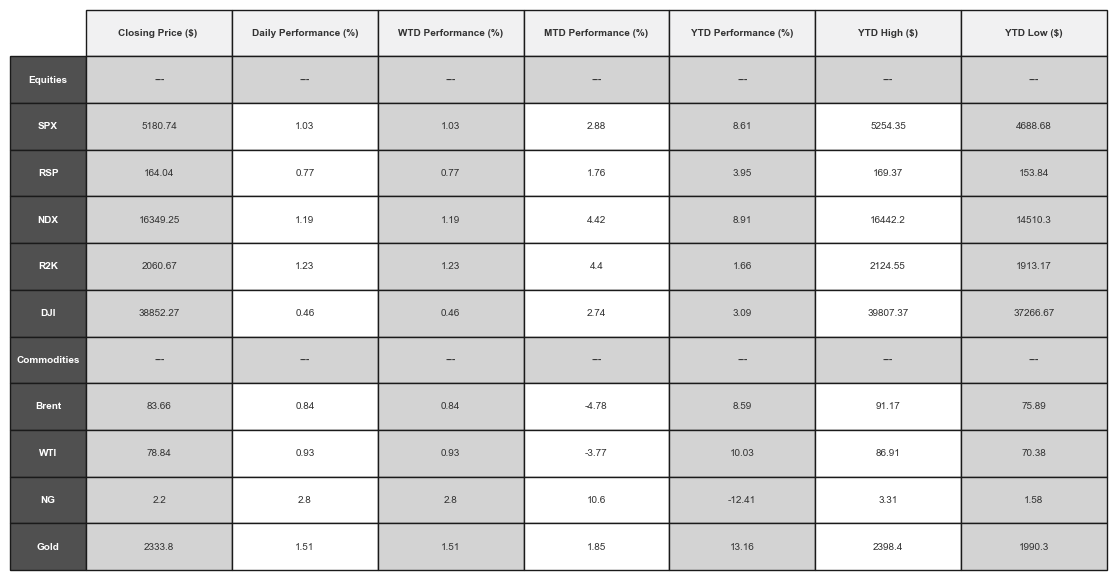

In [26]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed

# Hide axes
ax.axis('off')
ax.set_frame_on(False)

# Create the table and adjust its styling
tbl = ax.table(
    cellText=combined_data.values,
    bbox=[0, 0, 1, 1],
    colLabels=combined_data.columns,
    rowLabels=combined_data.index,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Style the table
# Setting the colors for the index column, header row, and category rows
index_col_color = '#505050'  # Dark gray
header_row_color = '#f1f1f2'  # Light gray for header
category_row_color = '#d3d3d3'  # Light gray for category rows 'Equities' and 'Commodities'

for (i, j), cell in tbl.get_celld().items():
    # Check if the cell's row label is 'Equities' or 'Commodities'
    row_label = combined_data.index[i-1] if i else ''
    if j == -1:  # Index column
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(index_col_color)
    elif row_label in ['Equities', 'Commodities']:  # Category rows
        cell.set_text_props(weight='bold')
        cell.set_facecolor(category_row_color)
    elif i == 0:  # Header row
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_row_color)
    else:  # Data cells
        cell.set_facecolor('white' if j % 2 else 'lightgray')  # Alternating colors for data cells

    # Bold text for index column and category rows
    if i > 0 and (j == -1 or row_label in ['Equities', 'Commodities']):
        cell.set_text_props(weight='bold')

# Tight layout to fit everything
plt.tight_layout()

# Use the string to format the filename
filename = f'market_performance_summary_{latest_business_day_str}.png'

# Save the figure with the dynamic filename
plt.savefig(filename, bbox_inches='tight', dpi=300)

# Display the figure
plt.show()


In [27]:
eq_prices = prices [["SPX", "RSP", "NDX", "R2K", "DJI"]]

In [28]:
eq_prices

,SPX,RSP,NDX,R2K,DJI
date,,,,,
2023-12-29,4769.830078,157.800003,15011.349609,2027.069946,37689.539062
2024-01-02,4742.830078,157.850006,14765.940430,2012.800049,37715.039062
2024-01-03,4704.810059,155.520004,14592.209961,1959.199951,37430.191406
2024-01-04,4688.680176,155.259995,14510.299805,1957.729980,37440.339844
2024-01-05,4697.240234,155.710007,14524.070312,1951.140015,37466.109375
...,...,...,...,...,...
2024-04-30,5035.689941,161.199997,15657.820312,1973.910034,37815.921875
2024-05-01,5018.390137,160.649994,15605.480469,1980.229980,37903.289062
2024-05-02,5064.200195,161.639999,15840.959961,2016.109985,38225.660156


In [29]:
# Calculate the WTD Performance (%)
eq_weekly_data = eq_prices[end_of_last_week:]
#wtd_start_price = prices.loc[start_of_current_week]
eq_wtd_start_price = eq_weekly_data.iloc[0] # First row of weekly_data is the start of the week
#wtd_performance = ((prices / wtd_start_price) - 1) * 100
eq_wtd_performance = ((eq_weekly_data / eq_wtd_start_price) - 1) * 100
# Convert the index to a DateTimeIndex if it's not already
eq_wtd_performance.index = pd.to_datetime(eq_wtd_performance.index)



# Calculate the MTD Performance (%)
eq_monthly_data = eq_prices[prev_monthend:]
#mtd_start_price = prices.loc[prev_monthend]
eq_mtd_start_price = eq_monthly_data.iloc[0] # First row of weekly_data is the start of the week
#mtd_performance = ((prices / mtd_start_price) - 1) * 100
eq_mtd_performance = ((eq_monthly_data / eq_mtd_start_price) - 1) * 100
eq_mtd_performance.index = pd.to_datetime(eq_mtd_performance.index)

# Calculate the YTD Performance (%)
eq_ytd_start_price = eq_prices.loc[prev_yearend]
eq_ytd_performance = ((eq_prices / eq_ytd_start_price) - 1) * 100
eq_ytd_performance.index = pd.to_datetime(eq_ytd_performance.index)

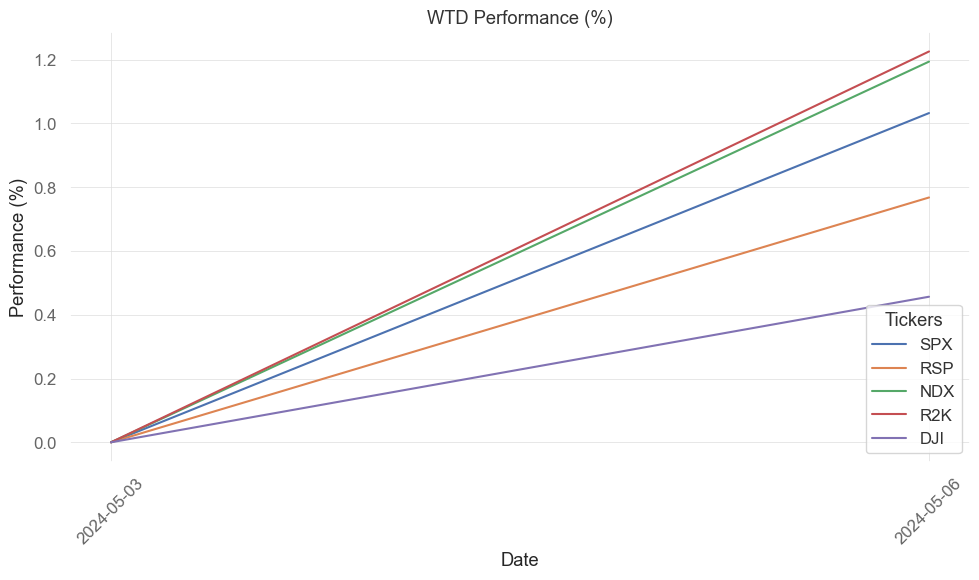

In [30]:
# Define a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a range of numbers to use as x-axis positions
x_positions = range(len(eq_wtd_performance))

# Plot each column using the generated positions
for column in eq_wtd_performance.columns:
    ax.plot(x_positions, eq_wtd_performance[column], label=column)

# Formatting the plot
ax.set_title('WTD Performance (%)')
ax.set_xlabel('Date')
ax.set_ylabel('Performance (%)')
ax.legend(title='Tickers', loc='lower right')  # Move legend to bottom right
ax.grid(True)

# Set the x-tick labels to the corresponding dates, ensuring only weekdays are shown
ax.set_xticks(x_positions)  # Set the ticks to the position of your dates
ax.set_xticklabels(eq_wtd_performance.index.strftime('%Y-%m-%d'))  # Format the labels from your index

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Tighten the plot to ensure no overlap
plt.tight_layout()

# Use the string to format the filename
filename_wtd = f'wtd_market_performance_summary_{latest_business_day_str}.png'

# Save the figure with the dynamic filename
plt.savefig(filename_wtd, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


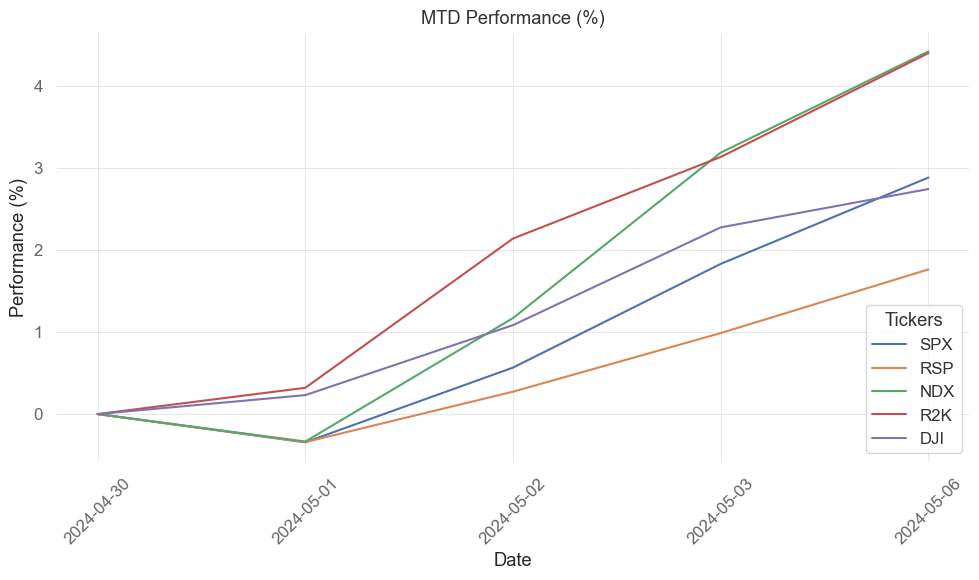

In [31]:
# Define a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a range of numbers to use as x-axis positions
x_positions = range(len(eq_mtd_performance))

# Plot each column using the generated positions
for column in eq_mtd_performance.columns:
    ax.plot(x_positions, eq_mtd_performance[column], label=column)

# Formatting the plot
ax.set_title('MTD Performance (%)')
ax.set_xlabel('Date')
ax.set_ylabel('Performance (%)')
ax.legend(title='Tickers', loc='lower right')  # Move legend to bottom right
ax.grid(True)

# Set the x-tick labels to the corresponding dates, ensuring only weekdays are shown
ax.set_xticks(x_positions)  # Set the ticks to the position of your dates
ax.set_xticklabels(eq_mtd_performance.index.strftime('%Y-%m-%d'))  # Format the labels from your index

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Tighten the plot to ensure no overlap
plt.tight_layout()

# Use the string to format the filename
filename_mtd = f'mtd_market_performance_summary_{latest_business_day_str}.png'

# Save the figure with the dynamic filename
plt.savefig(filename_mtd, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

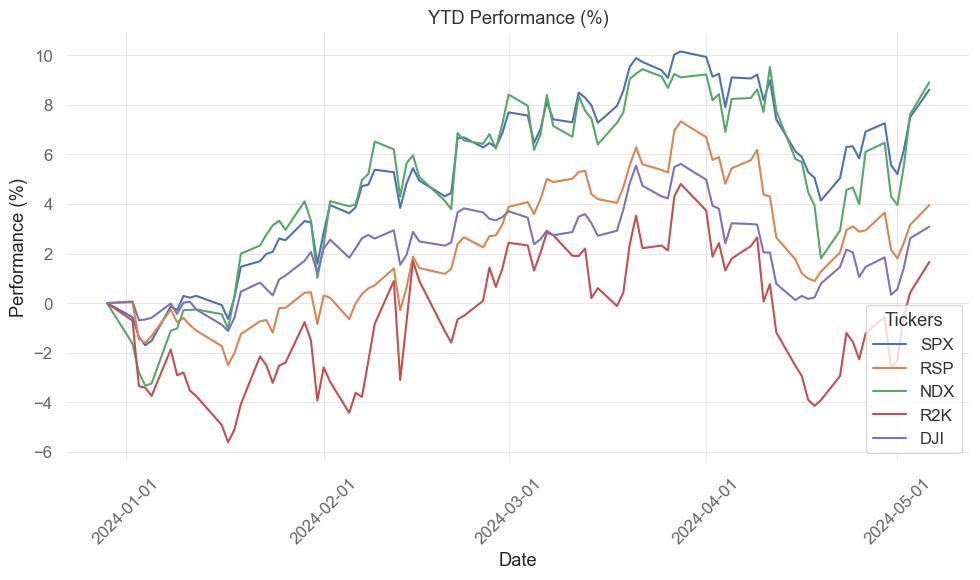

In [32]:
# Define a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column
for column in eq_ytd_performance.columns:
    ax.plot(eq_ytd_performance.index, eq_ytd_performance[column], label=column)

# Formatting the plot
ax.set_title('YTD Performance (%)')
ax.set_xlabel('Date')
ax.set_ylabel('Performance (%)')
ax.legend(title='Tickers', loc='lower right')  # Move legend to bottom right
ax.grid(True)

# Set the x-tick labels to the corresponding dates, ensuring only weekdays are shown
# Here, we will use MonthLocator to place a tick on the first weekday of each month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, you can add minor ticks for more granularity without text labels
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45)

# Tighten the plot to ensure no overlap
plt.tight_layout()

# Use the string to format the filename
filename_ytd = f'ytd_market_performance_summary_{latest_business_day_str}.png'

# Save the figure with the dynamic filename
plt.savefig(filename_ytd, bbox_inches='tight', dpi=300)

# Show the plot
plt.show()
